# Initialize

## Initialization

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from timeit import default_timer as timer
from jupyterthemes import jtplot
jtplot.reset()

fig_dir = "figures/"
paper_fig_dir = "C:\\Users\\rtorre\\Dropbox\\Work\\04_Projects\\Git\\GitHub\\NormalizingFlows\\NormalizingFlows\\papers\\NFHD\\figures\\" 

## Useful functions

In [9]:
def build_data_from_runs(path,save_file_name,results="succeeded"):
    print("Processing path", path,"for",results,"runs.")
    runs_list=[[int(i.replace("run_","")),os.path.abspath(os.path.join(os.path.join(path,i),"results.txt"))] for i in os.listdir(path) if ("run" in i and os.path.isdir(os.path.abspath(os.path.join(path,i))))]
    runs_list.sort()
    if os.path.exists(runs_list[0][1]):
        data=pd.read_csv(runs_list[0][1])
        i=1
        j=0
    else:
        print("No results available for run",runs_list[0][1])
        data=pd.DataFrame()
        i=0
        j=0
    for run in runs_list[1:]:
        if os.path.exists(run[1]):
            tmp = pd.read_csv(run[1]).pop("time")
            if 'nan' in str(tmp) or "failed" in str(tmp):
                if results == "all":
                    data=pd.concat([data,pd.read_csv(run[1])])
                else:
                    pass
            else:
                data=pd.concat([data,pd.read_csv(run[1])])
            i=i+1
        else:
            j=j+1
            print("No results available for run",run[0])
    data = data.reset_index(drop=True).replace("failed","nan")
    print("Succesfully imported", i, "runs (failed to import",j,"runs).")
    save_path = os.path.abspath(os.path.join(path,save_file_name))
    data.to_csv(save_path,index=False)
    print("Succesfully saved data to file", save_path)
    return data

In [10]:
def extract_lines(df_bests,bij,corr,metric):
    result = []
    for df in df_bests:
        tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
        if tmp != []:
            result.append(tmp)
    return np.array(result)

# Results for truncated

## Check, fix, import results

### Check and fix results

In [11]:
hm_correlated_results_paths = {"MAFN": "Truncated/results/MAFN/",
                               "RealNVPN": "Truncated/results/RealNVPN/",
                               "MsplineN": "Truncated/results/MsplineN/",
                               "CsplineN": "Truncated/results/CsplineN/"
                              }

In [12]:
for res in hm_correlated_results_paths.values():
    build_data_from_runs(res,"log_file_eternal_final.txt")

Processing path Truncated/results/MAFN/ for succeeded runs.
Succesfully imported 24 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\Truncated\results\MAFN\log_file_eternal_final.txt
Processing path Truncated/results/RealNVPN/ for succeeded runs.
Succesfully imported 24 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\Truncated\results\RealNVPN\log_file_eternal_final.txt
Processing path Truncated/results/MsplineN/ for succeeded runs.
Succesfully imported 24 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\Truncated\results\MsplineN\log_file_eternal_final.txt
Processing path Truncated/results/CsplineN/ for succeeded runs.
Succesfully imported 72 runs (fa

### Import results

In [13]:
tmp_paths = {k: v+"log_file_eternal_final.txt" for k,v in hm_correlated_results_paths.items()}
tmp = {k: pd.read_csv(tmp_paths[k]) for k in tmp_paths.keys()}
try:
    for k in tmp.keys():
        tmp[k]["epochs_input"] = tmp[k]["epochs_input"].fillna(1000)
        tmp[k]["epochs_output"] = tmp[k]["epochs_output"].fillna(0)
except:
    pass
df_truncated = pd.concat([df for df in tmp.values()],ignore_index=True).dropna().reset_index(drop=True)
df_truncated = df_truncated[~(df_truncated == 'failed').any(axis=1)]
len(df_truncated)

144

In [14]:
df_truncated

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,...,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,1,0,4,100000,corr,5,MAFN,relu,8,-16,...,0.219928,0.216913,0.009770,0.009770,0.017493,128-128-128,512,1000,311,730.402949
1,2,0,4,100000,corr,5,MAFN,relu,8,-16,...,0.218538,0.213860,0.007895,0.007895,0.035527,256-256-256,512,1000,188,452.992447
2,3,0,4,100000,corr,10,MAFN,relu,8,-16,...,0.210508,0.211720,0.012134,0.012134,0.033345,128-128-128,512,1000,126,556.858462
3,4,0,4,100000,corr,10,MAFN,relu,8,-16,...,0.212043,0.201344,0.008591,0.008591,0.050534,256-256-256,512,1000,109,493.012652
4,5,0,8,100000,corr,5,MAFN,relu,8,-16,...,0.144088,0.112930,0.008709,0.008709,0.097845,128-128-128,512,1000,190,457.467427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,68,0,100,100000,corr,10,CsplineN,relu,8,-16,...,0.001000,0.001235,0.341978,0.341978,5.131375,256-256-256,512,1000,1000,43186.630364
140,69,0,100,100000,corr,10,CsplineN,relu,8,-16,...,0.001000,0.018953,0.157812,0.157812,5.140829,512-512-512,512,1000,1000,40403.486394
141,70,0,100,100000,corr,10,CsplineN,relu,12,-16,...,0.001000,0.001798,0.300735,0.300735,5.226730,128-128-128,512,1000,1000,48541.495953
142,71,0,100,100000,corr,10,CsplineN,relu,12,-16,...,0.001000,0.001349,0.293441,0.293441,5.130499,256-256-256,512,1000,606,35456.869442


## Results for different dimensions

### 4D

In [15]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\1213436705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,4,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.493525,0.500822,0.221889,0.221975,0.003111,0.003111,0.017446,256-256-256,512,1000,389,2148.551233
1,3,0,4,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.478732,0.489959,0.218199,0.215192,0.004169,0.004169,0.045628,128-128-128,256,1000,248,2620.448707
2,1,0,4,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.471075,0.468796,0.221230,0.220640,0.004232,0.004232,0.017968,128-128-128,512,1000,524,2869.048213
3,3,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.459146,0.471452,0.218991,0.212542,0.004754,0.004754,0.019433,128-128-128,512,1000,445,2422.353115
4,10,0,4,100000,corr,10,CsplineN,relu,12,-16,0,None,-1,0.496889,0.482530,0.221982,0.219967,0.004946,0.004946,0.024837,128-128-128,512,1000,340,19829.786089
5,2,0,4,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.453273,0.456069,0.217951,0.217859,0.005069,0.005069,0.020046,256-256-256,512,1000,447,2510.968583
6,2,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.529890,0.530045,0.220319,0.220675,0.005135,0.005135,0.031817,256-256-256,512,1000,410,8862.468224
7,1,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.527004,0.523506,0.219721,0.220186,0.005515,0.005515,0.026714,128-128-128,512,1000,409,8546.591461
8,4,0,4,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.485642,0.491667,0.217817,0.213296,0.005996,0.005996,0.036951,256-256-256,256,1000,322,3448.604174
9,2,0,4,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.530244,0.520479,0.226517,0.226295,0.006202,0.006202,0.034699,256-256-256,256,1000,478,2731.193399


In [16]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_4D_truncated_WD=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_truncated_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\1115422830.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\1115422830.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\1115422830.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\1115422830.py:6: UserW

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,4,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.493525,0.500822,0.221889,0.221975,0.003111,0.003111,0.017446,256-256-256,512,1000,389,2148.551233
1,3,0,4,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.478732,0.489959,0.218199,0.215192,0.004169,0.004169,0.045628,128-128-128,256,1000,248,2620.448707
4,10,0,4,100000,corr,10,CsplineN,relu,12,-16,0,None,-1,0.496889,0.482530,0.221982,0.219967,0.004946,0.004946,0.024837,128-128-128,512,1000,340,19829.786089
18,2,0,4,100000,corr,5,MAFN,relu,8,-16,0,None,-1,0.510364,0.498268,0.218538,0.213860,0.007895,0.007895,0.035527,256-256-256,512,1000,188,452.992447


In [17]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\424194275.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,3,0,4,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.517505,0.531705,0.210508,0.211720,0.012134,0.012134,0.033345,128-128-128,512,1000,126,556.858462
1,2,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.529890,0.530045,0.220319,0.220675,0.005135,0.005135,0.031817,256-256-256,512,1000,410,8862.468224
2,12,0,4,100000,corr,10,CsplineN,relu,12,-16,0,None,-1,0.517644,0.524747,0.221037,0.219494,0.007285,0.007285,0.023495,512-512-512,512,1000,424,24038.701995
3,1,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.527004,0.523506,0.219721,0.220186,0.005515,0.005515,0.026714,128-128-128,512,1000,409,8546.591461
4,4,0,4,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.516967,0.522112,0.218532,0.217306,0.006544,0.006544,0.027751,128-128-128,512,1000,395,10383.350411
5,2,0,4,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.530244,0.520479,0.226517,0.226295,0.006202,0.006202,0.034699,256-256-256,256,1000,478,2731.193399
6,11,0,4,100000,corr,10,CsplineN,relu,12,-16,0,None,-1,0.512410,0.520244,0.220645,0.219649,0.006406,0.006406,0.022570,256-256-256,512,1000,303,16162.758664
7,9,0,4,100000,corr,10,CsplineN,relu,8,-16,0,None,-1,0.517217,0.519843,0.222441,0.221083,0.006449,0.006449,0.025089,512-512-512,512,1000,542,25918.372064
8,1,0,4,100000,corr,5,MAFN,relu,8,-16,0,None,-1,0.508574,0.515531,0.219928,0.216913,0.009770,0.009770,0.017493,128-128-128,512,1000,311,730.402949
9,5,0,4,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.505505,0.507974,0.217040,0.214728,0.007650,0.007650,0.025254,256-256-256,512,1000,400,9736.437954


In [18]:
sort_metric="ks_test_median"
ascending=False
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_4D_truncated_KS=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_truncated_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2550996223.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2550996223.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2550996223.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2550996223.py:6: UserW

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,3,0,4,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.517505,0.531705,0.210508,0.211720,0.012134,0.012134,0.033345,128-128-128,512,1000,126,556.858462
1,2,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.529890,0.530045,0.220319,0.220675,0.005135,0.005135,0.031817,256-256-256,512,1000,410,8862.468224
5,2,0,4,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.530244,0.520479,0.226517,0.226295,0.006202,0.006202,0.034699,256-256-256,256,1000,478,2731.193399
10,4,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.493525,0.500822,0.221889,0.221975,0.003111,0.003111,0.017446,256-256-256,512,1000,389,2148.551233


### 8D

In [19]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2452160644.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,7,0,8,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.417135,0.453825,0.195221,0.177345,0.004098,0.004098,0.066470,128-128-128,256,1000,208,2166.335875
1,7,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.444097,0.485296,0.214550,0.202183,0.004169,0.004169,0.056300,128-128-128,512,1000,314,1756.678473
2,21,0,8,100000,corr,10,CsplineN,relu,8,-16,0,None,-1,0.447396,0.434183,0.211762,0.200201,0.005004,0.005004,0.050742,512-512-512,512,1000,266,11918.308860
3,17,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.467242,0.470512,0.206329,0.204851,0.005117,0.005117,0.053662,256-256-256,512,1000,219,8925.027893
4,8,0,8,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.435959,0.450364,0.196519,0.183232,0.005992,0.005992,0.088298,256-256-256,256,1000,216,2240.639734
5,5,0,8,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.379857,0.387591,0.176838,0.155891,0.006304,0.006304,0.095134,128-128-128,256,1000,448,2486.996582
6,8,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.444782,0.463191,0.210801,0.198086,0.006460,0.006460,0.060406,256-256-256,512,1000,202,1120.411976
7,14,0,8,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.397508,0.408369,0.189309,0.177608,0.006510,0.006510,0.072527,256-256-256,512,1000,276,7203.475349
8,19,0,8,100000,corr,10,CsplineN,relu,8,-16,0,None,-1,0.438780,0.456120,0.199252,0.191652,0.006730,0.006730,0.061716,128-128-128,512,1000,265,19163.695043
9,24,0,8,100000,corr,10,CsplineN,relu,12,-16,0,None,-1,0.372411,0.425866,0.187086,0.164038,0.006957,0.006957,0.080804,512-512-512,512,1000,204,11426.392822


In [20]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_8D_truncated_WD=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_truncated_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2711534640.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2711534640.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2711534640.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2711534640.py:6: UserW

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,7,0,8,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.417135,0.453825,0.195221,0.177345,0.004098,0.004098,0.066470,128-128-128,256,1000,208,2166.335875
1,7,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.444097,0.485296,0.214550,0.202183,0.004169,0.004169,0.056300,128-128-128,512,1000,314,1756.678473
2,21,0,8,100000,corr,10,CsplineN,relu,8,-16,0,None,-1,0.447396,0.434183,0.211762,0.200201,0.005004,0.005004,0.050742,512-512-512,512,1000,266,11918.308860
15,5,0,8,100000,corr,5,MAFN,relu,8,-16,0,None,-1,0.291021,0.344190,0.144088,0.112930,0.008709,0.008709,0.097845,128-128-128,512,1000,190,457.467427


In [21]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\1231054557.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,7,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.444097,0.485296,0.214550,0.202183,0.004169,0.004169,0.056300,128-128-128,512,1000,314,1756.678473
1,17,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.467242,0.470512,0.206329,0.204851,0.005117,0.005117,0.053662,256-256-256,512,1000,219,8925.027893
2,22,0,8,100000,corr,10,CsplineN,relu,12,-16,0,None,-1,0.444262,0.464136,0.202462,0.197902,0.008089,0.008089,0.059254,128-128-128,512,1000,311,16070.026655
3,8,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.444782,0.463191,0.210801,0.198086,0.006460,0.006460,0.060406,256-256-256,512,1000,202,1120.411976
4,13,0,8,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.457451,0.461027,0.206661,0.204807,0.007368,0.007368,0.049265,128-128-128,512,1000,210,4786.116141
5,19,0,8,100000,corr,10,CsplineN,relu,8,-16,0,None,-1,0.438780,0.456120,0.199252,0.191652,0.006730,0.006730,0.061716,128-128-128,512,1000,265,19163.695043
6,7,0,8,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.417135,0.453825,0.195221,0.177345,0.004098,0.004098,0.066470,128-128-128,256,1000,208,2166.335875
7,8,0,8,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.435959,0.450364,0.196519,0.183232,0.005992,0.005992,0.088298,256-256-256,256,1000,216,2240.639734
8,15,0,8,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.422844,0.438455,0.190908,0.183458,0.008771,0.008771,0.072191,512-512-512,512,1000,363,10890.470536
9,6,0,8,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.410323,0.436356,0.182581,0.161642,0.007683,0.007683,0.114636,256-256-256,256,1000,341,1917.284833


In [22]:
sort_metric="ks_test_median"
ascending=False
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_8D_truncated_KS=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_truncated_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\4123505892.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\4123505892.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\4123505892.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\4123505892.py:6: UserW

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,7,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.444097,0.485296,0.214550,0.202183,0.004169,0.004169,0.056300,128-128-128,512,1000,314,1756.678473
1,17,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.467242,0.470512,0.206329,0.204851,0.005117,0.005117,0.053662,256-256-256,512,1000,219,8925.027893
6,7,0,8,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.417135,0.453825,0.195221,0.177345,0.004098,0.004098,0.066470,128-128-128,256,1000,208,2166.335875
20,8,0,8,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.280372,0.346199,0.140896,0.110688,0.013202,0.013202,0.146738,256-256-256,512,1000,149,681.036166


### 16D

In [23]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3470983336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,11,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.475750,0.503680,0.214629,0.200337,0.004140,0.004140,0.121494,128-128-128,512,1000,259,1426.044525
1,9,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.456585,0.486205,0.208131,0.195604,0.005477,0.005477,0.124719,128-128-128,512,1000,256,1403.643044
2,12,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.398899,0.453059,0.192423,0.172424,0.006064,0.006064,0.131222,256-256-256,512,1000,122,671.690627
3,9,0,16,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.421455,0.437735,0.166464,0.159431,0.007810,0.007810,0.162113,128-128-128,256,1000,360,1788.270285
4,28,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.308581,0.295446,0.152259,0.133892,0.009451,0.009451,0.159880,128-128-128,512,1000,196,5015.681480
5,30,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.322237,0.392921,0.154671,0.133508,0.012169,0.012169,0.226528,512-512-512,512,1000,136,3595.645528
6,11,0,16,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.278273,0.340077,0.096790,0.104929,0.014037,0.014037,0.276079,128-128-128,256,1000,162,1552.341277
7,29,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.285651,0.328151,0.151112,0.120156,0.014308,0.014308,0.189316,256-256-256,512,1000,129,3380.710209
8,11,0,16,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.250332,0.254207,0.099201,0.099722,0.014993,0.014993,0.219254,128-128-128,512,1000,304,1390.375474
9,26,0,16,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.290566,0.331413,0.133880,0.124030,0.015103,0.015103,0.190132,256-256-256,512,1000,121,2718.736076


In [24]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_16D_truncated_WD=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_truncated_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3674732535.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3674732535.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3674732535.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3674732535.py:6: UserW

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,11,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.475750,0.503680,0.214629,0.200337,0.004140,0.004140,0.121494,128-128-128,512,1000,259,1426.044525
3,9,0,16,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.421455,0.437735,0.166464,0.159431,0.007810,0.007810,0.162113,128-128-128,256,1000,360,1788.270285
4,28,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.308581,0.295446,0.152259,0.133892,0.009451,0.009451,0.159880,128-128-128,512,1000,196,5015.681480
8,11,0,16,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.250332,0.254207,0.099201,0.099722,0.014993,0.014993,0.219254,128-128-128,512,1000,304,1390.375474


In [25]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\1126557268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,11,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.475750,0.503680,0.214629,0.200337,0.004140,0.004140,0.121494,128-128-128,512,1000,259,1426.044525
1,9,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.456585,0.486205,0.208131,0.195604,0.005477,0.005477,0.124719,128-128-128,512,1000,256,1403.643044
2,12,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.398899,0.453059,0.192423,0.172424,0.006064,0.006064,0.131222,256-256-256,512,1000,122,671.690627
3,9,0,16,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.421455,0.437735,0.166464,0.159431,0.007810,0.007810,0.162113,128-128-128,256,1000,360,1788.270285
4,30,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.322237,0.392921,0.154671,0.133508,0.012169,0.012169,0.226528,512-512-512,512,1000,136,3595.645528
5,11,0,16,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.278273,0.340077,0.096790,0.104929,0.014037,0.014037,0.276079,128-128-128,256,1000,162,1552.341277
6,10,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.295145,0.331955,0.164520,0.135989,0.015850,0.015850,0.121993,256-256-256,512,1000,120,669.603811
7,26,0,16,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.290566,0.331413,0.133880,0.124030,0.015103,0.015103,0.190132,256-256-256,512,1000,121,2718.736076
8,29,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.285651,0.328151,0.151112,0.120156,0.014308,0.014308,0.189316,256-256-256,512,1000,129,3380.710209
9,32,0,16,100000,corr,10,CsplineN,relu,8,-16,0,None,-1,0.294611,0.323175,0.135826,0.119334,0.015769,0.015769,0.207881,256-256-256,512,1000,143,6508.505871


In [26]:
sort_metric="ks_test_median"
ascending=False
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_16D_truncated_KS=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_truncated_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3039092269.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3039092269.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3039092269.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3039092269.py:6: UserW

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,11,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.475750,0.503680,0.214629,0.200337,0.004140,0.004140,0.121494,128-128-128,512,1000,259,1426.044525
3,9,0,16,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.421455,0.437735,0.166464,0.159431,0.007810,0.007810,0.162113,128-128-128,256,1000,360,1788.270285
4,30,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.322237,0.392921,0.154671,0.133508,0.012169,0.012169,0.226528,512-512-512,512,1000,136,3595.645528
16,11,0,16,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.250332,0.254207,0.099201,0.099722,0.014993,0.014993,0.219254,128-128-128,512,1000,304,1390.375474


### 32D

In [27]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\1273372029.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,15,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.467854,0.493765,0.214032,0.203116,0.003338,0.003338,0.239700,128-128-128,512,1000,295,1553.346165
1,13,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.446340,0.481222,0.209015,0.194479,0.003973,0.003973,0.242394,128-128-128,512,1000,262,1355.180571
2,40,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.366881,0.401682,0.178222,0.157762,0.006505,0.006505,0.400132,128-128-128,512,1000,255,6355.617803
3,14,0,32,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.259783,0.263451,0.072789,0.082828,0.007756,0.007756,0.404868,256-256-256,256,1000,343,1510.961066
4,37,0,32,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.326510,0.323673,0.145294,0.137522,0.008303,0.008303,0.304121,128-128-128,512,1000,411,9121.161840
5,15,0,32,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.266076,0.317324,0.117738,0.101239,0.008562,0.008562,0.321708,128-128-128,512,1000,307,1384.391694
6,13,0,32,100000,corr,5,MAFN,relu,8,-16,0,None,-1,0.284111,0.344295,0.134226,0.108015,0.008630,0.008630,0.257346,128-128-128,512,1000,687,1686.865917
7,14,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.316708,0.354807,0.168153,0.138056,0.008757,0.008757,0.253672,256-256-256,512,1000,171,918.939649
8,13,0,32,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.239867,0.257780,0.066475,0.076402,0.009696,0.009696,0.410292,128-128-128,256,1000,361,1790.976879
9,16,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.305123,0.333463,0.137041,0.133675,0.010507,0.010507,0.248479,256-256-256,512,1000,148,810.268317


In [28]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_32D_truncated_WD=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_truncated_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\999706263.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\999706263.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\999706263.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\999706263.py:6: UserWarni

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,15,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.467854,0.493765,0.214032,0.203116,0.003338,0.003338,0.239700,128-128-128,512,1000,295,1553.346165
2,40,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.366881,0.401682,0.178222,0.157762,0.006505,0.006505,0.400132,128-128-128,512,1000,255,6355.617803
3,14,0,32,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.259783,0.263451,0.072789,0.082828,0.007756,0.007756,0.404868,256-256-256,256,1000,343,1510.961066
5,15,0,32,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.266076,0.317324,0.117738,0.101239,0.008562,0.008562,0.321708,128-128-128,512,1000,307,1384.391694


In [29]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2266178271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,15,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.467854,0.493765,0.214032,0.203116,0.003338,0.003338,0.239700,128-128-128,512,1000,295,1553.346165
1,13,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.446340,0.481222,0.209015,0.194479,0.003973,0.003973,0.242394,128-128-128,512,1000,262,1355.180571
2,40,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.366881,0.401682,0.178222,0.157762,0.006505,0.006505,0.400132,128-128-128,512,1000,255,6355.617803
3,14,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.316708,0.354807,0.168153,0.138056,0.008757,0.008757,0.253672,256-256-256,512,1000,171,918.939649
4,13,0,32,100000,corr,5,MAFN,relu,8,-16,0,None,-1,0.284111,0.344295,0.134226,0.108015,0.008630,0.008630,0.257346,128-128-128,512,1000,687,1686.865917
5,16,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.305123,0.333463,0.137041,0.133675,0.010507,0.010507,0.248479,256-256-256,512,1000,148,810.268317
6,37,0,32,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.326510,0.323673,0.145294,0.137522,0.008303,0.008303,0.304121,128-128-128,512,1000,411,9121.161840
7,15,0,32,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.266076,0.317324,0.117738,0.101239,0.008562,0.008562,0.321708,128-128-128,512,1000,307,1384.391694
8,14,0,32,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.259783,0.263451,0.072789,0.082828,0.007756,0.007756,0.404868,256-256-256,256,1000,343,1510.961066
9,13,0,32,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.239867,0.257780,0.066475,0.076402,0.009696,0.009696,0.410292,128-128-128,256,1000,361,1790.976879


In [30]:
sort_metric="ks_test_median"
ascending=False
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_32D_truncated_KS=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_truncated_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\32338468.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\32338468.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\32338468.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\32338468.py:6: UserWarning: 

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,15,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.467854,0.493765,0.214032,0.203116,0.003338,0.003338,0.239700,128-128-128,512,1000,295,1553.346165
2,40,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.366881,0.401682,0.178222,0.157762,0.006505,0.006505,0.400132,128-128-128,512,1000,255,6355.617803
4,13,0,32,100000,corr,5,MAFN,relu,8,-16,0,None,-1,0.284111,0.344295,0.134226,0.108015,0.008630,0.008630,0.257346,128-128-128,512,1000,687,1686.865917
8,14,0,32,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.259783,0.263451,0.072789,0.082828,0.007756,0.007756,0.404868,256-256-256,256,1000,343,1510.961066


### 64D

In [31]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2993665217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,19,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.473892,0.496019,0.214028,0.204735,0.004166,0.004166,0.472404,128-128-128,512,1000,350,2607.073805
1,17,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.461746,0.492762,0.212877,0.200128,0.004432,0.004432,0.479144,128-128-128,512,1000,376,2003.849742
2,20,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.457067,0.496868,0.211069,0.195329,0.004563,0.004563,0.477166,256-256-256,512,1000,203,1239.815775
3,52,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.308331,0.362923,0.166899,0.139354,0.010356,0.010356,0.537079,128-128-128,512,1000,932,22134.398305
4,18,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.281057,0.305812,0.131145,0.122278,0.011758,0.011758,0.479294,256-256-256,512,1000,153,846.130894
5,49,0,64,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.296868,0.329437,0.162515,0.137940,0.012464,0.012464,0.580154,128-128-128,512,1000,534,11095.111322
6,53,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.249783,0.272620,0.105287,0.103390,0.013000,0.013000,0.730874,256-256-256,512,1000,173,4176.701466
7,19,0,64,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.174951,0.121798,0.021379,0.060031,0.015843,0.015843,0.721317,128-128-128,512,1000,324,1350.491978
8,51,0,64,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.161984,0.147496,0.047110,0.069563,0.017699,0.017699,1.004835,512-512-512,512,1000,127,2672.309321
9,20,0,64,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.113398,0.049097,0.005703,0.034484,0.018543,0.018543,1.164237,256-256-256,512,1000,195,861.823162


In [32]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_64D_truncated_WD=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_truncated_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3474806264.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3474806264.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3474806264.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\3474806264.py:6: UserW

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,19,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.473892,0.496019,0.214028,0.204735,0.004166,0.004166,0.472404,128-128-128,512,1000,350,2607.073805
3,52,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.308331,0.362923,0.166899,0.139354,0.010356,0.010356,0.537079,128-128-128,512,1000,932,22134.398305
7,19,0,64,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.174951,0.121798,0.021379,0.060031,0.015843,0.015843,0.721317,128-128-128,512,1000,324,1350.491978
10,19,0,64,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.115170,0.075017,0.011790,0.032058,0.018811,0.018811,1.823922,128-128-128,256,1000,260,2378.774080


In [33]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2639017273.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,20,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.457067,0.496868,0.211069,0.195329,0.004563,0.004563,0.477166,256-256-256,512,1000,203,1239.815775
1,19,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.473892,0.496019,0.214028,0.204735,0.004166,0.004166,0.472404,128-128-128,512,1000,350,2607.073805
2,17,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.461746,0.492762,0.212877,0.200128,0.004432,0.004432,0.479144,128-128-128,512,1000,376,2003.849742
3,52,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.308331,0.362923,0.166899,0.139354,0.010356,0.010356,0.537079,128-128-128,512,1000,932,22134.398305
4,49,0,64,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.296868,0.329437,0.162515,0.137940,0.012464,0.012464,0.580154,128-128-128,512,1000,534,11095.111322
5,18,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.281057,0.305812,0.131145,0.122278,0.011758,0.011758,0.479294,256-256-256,512,1000,153,846.130894
6,53,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.249783,0.272620,0.105287,0.103390,0.013000,0.013000,0.730874,256-256-256,512,1000,173,4176.701466
7,51,0,64,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.161984,0.147496,0.047110,0.069563,0.017699,0.017699,1.004835,512-512-512,512,1000,127,2672.309321
8,54,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.173608,0.124720,0.039753,0.070533,0.018821,0.018821,0.896637,512-512-512,512,1000,137,3317.615374
9,19,0,64,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.174951,0.121798,0.021379,0.060031,0.015843,0.015843,0.721317,128-128-128,512,1000,324,1350.491978


In [34]:
sort_metric="ks_test_median"
ascending=False
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_64D_truncated_KS=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_truncated_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\881185109.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\881185109.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\881185109.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\881185109.py:6: UserWarni

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,20,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.457067,0.496868,0.211069,0.195329,0.004563,0.004563,0.477166,256-256-256,512,1000,203,1239.815775
3,52,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.308331,0.362923,0.166899,0.139354,0.010356,0.010356,0.537079,128-128-128,512,1000,932,22134.398305
9,19,0,64,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.174951,0.121798,0.021379,0.060031,0.015843,0.015843,0.721317,128-128-128,512,1000,324,1350.491978
10,17,0,64,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.132821,0.083111,0.016299,0.036723,0.020983,0.020983,0.640754,128-128-128,256,1000,941,4647.128738


### 100D

In [35]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2293442377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,21,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.481507,0.497426,0.215530,0.209494,0.003865,0.003865,0.739869,128-128-128,512,1000,384,2104.272948
1,23,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.497954,0.499287,0.214269,0.214318,0.004223,0.004223,0.735782,128-128-128,512,1000,397,2173.165026
2,24,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.469325,0.485636,0.211120,0.202828,0.004853,0.004853,0.748293,256-256-256,512,1000,198,1049.703914
3,22,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.460988,0.483581,0.211837,0.200853,0.005092,0.005092,0.743060,256-256-256,512,1000,225,1232.893701
4,23,0,100,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.119018,0.071529,0.009588,0.035482,0.020756,0.020756,1.075765,128-128-128,512,1000,304,1336.503350
5,22,0,100,100000,corr,5,MAFN,relu,8,-16,0,None,-1,0.087596,0.052367,0.005373,0.026881,0.024399,0.024399,1.049174,256-256-256,512,1000,397,937.188487
6,21,0,100,100000,corr,5,MAFN,relu,8,-16,0,None,-1,0.095668,0.055730,0.006251,0.028380,0.025713,0.025713,0.862664,128-128-128,512,1000,607,1415.077984
7,22,0,100,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.027059,0.005343,0.001086,0.004198,0.025965,0.025965,1.388506,256-256-256,256,1000,1000,5208.295035
8,23,0,100,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.055039,0.034794,0.004685,0.013210,0.027441,0.027441,1.241815,128-128-128,256,1000,425,4059.307385
9,24,0,100,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.059066,0.014726,0.002262,0.016274,0.027712,0.027712,2.351368,256-256-256,512,1000,149,676.230905


In [36]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_100D_truncated_WD=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_truncated_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\569564179.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\569564179.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\569564179.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\569564179.py:6: UserWarni

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,21,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.481507,0.497426,0.215530,0.209494,0.003865,0.003865,0.739869,128-128-128,512,1000,384,2104.272948
4,23,0,100,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.119018,0.071529,0.009588,0.035482,0.020756,0.020756,1.075765,128-128-128,512,1000,304,1336.503350
7,22,0,100,100000,corr,5,RealNVPN,relu,8,-16,0,None,-1,0.027059,0.005343,0.001086,0.004198,0.025965,0.025965,1.388506,256-256-256,256,1000,1000,5208.295035
11,65,0,100,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.097738,0.061966,0.010386,0.040333,0.030222,0.030222,0.735896,256-256-256,512,1000,1000,25587.233270


In [37]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\2262918278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,23,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.497954,0.499287,0.214269,0.214318,0.004223,0.004223,0.735782,128-128-128,512,1000,397,2173.165026
1,21,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.481507,0.497426,0.215530,0.209494,0.003865,0.003865,0.739869,128-128-128,512,1000,384,2104.272948
2,24,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.469325,0.485636,0.211120,0.202828,0.004853,0.004853,0.748293,256-256-256,512,1000,198,1049.703914
3,22,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.460988,0.483581,0.211837,0.200853,0.005092,0.005092,0.743060,256-256-256,512,1000,225,1232.893701
4,23,0,100,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.119018,0.071529,0.009588,0.035482,0.020756,0.020756,1.075765,128-128-128,512,1000,304,1336.503350
5,65,0,100,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.097738,0.061966,0.010386,0.040333,0.030222,0.030222,0.735896,256-256-256,512,1000,1000,25587.233270
6,21,0,100,100000,corr,5,MAFN,relu,8,-16,0,None,-1,0.095668,0.055730,0.006251,0.028380,0.025713,0.025713,0.862664,128-128-128,512,1000,607,1415.077984
7,22,0,100,100000,corr,5,MAFN,relu,8,-16,0,None,-1,0.087596,0.052367,0.005373,0.026881,0.024399,0.024399,1.049174,256-256-256,512,1000,397,937.188487
8,62,0,100,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.076567,0.037483,0.006241,0.030854,0.031484,0.031484,0.734994,256-256-256,512,1000,1000,25148.345718
9,23,0,100,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.055039,0.034794,0.004685,0.013210,0.027441,0.027441,1.241815,128-128-128,256,1000,425,4059.307385


In [38]:
sort_metric="ks_test_median"
ascending=False
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_100D_truncated_KS=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_truncated_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\1607048678.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\1607048678.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\1607048678.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_6408\1607048678.py:6: UserW

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,23,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.497954,0.499287,0.214269,0.214318,0.004223,0.004223,0.735782,128-128-128,512,1000,397,2173.165026
4,23,0,100,100000,corr,10,MAFN,relu,8,-16,0,None,-1,0.119018,0.071529,0.009588,0.035482,0.020756,0.020756,1.075765,128-128-128,512,1000,304,1336.503350
5,65,0,100,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.097738,0.061966,0.010386,0.040333,0.030222,0.030222,0.735896,256-256-256,512,1000,1000,25587.233270
9,23,0,100,100000,corr,10,RealNVPN,relu,8,-16,0,None,-1,0.055039,0.034794,0.004685,0.013210,0.027441,0.027441,1.241815,128-128-128,256,1000,425,4059.307385


## Best models

In [39]:
df_bests_truncated = [df_best_4D_truncated_WD,df_best_8D_truncated_WD,df_best_16D_truncated_WD,df_best_32D_truncated_WD,df_best_64D_truncated_WD,df_best_100D_truncated_WD]

In [40]:
df_bests_truncated

[    run_n  run_seed  ndims  nsamples correlation  nbijectors  bijector  \
 0       4         0      4    100000        corr           2  MsplineN   
 1       3         0      4    100000        corr          10  RealNVPN   
 4      10         0      4    100000        corr          10  CsplineN   
 18      2         0      4    100000        corr           5      MAFN   
 
    activation  spline_knots  range_min  ...  ad_test_mean ad_test_median  \
 0        relu            12        -16  ...      0.221889       0.221975   
 1        relu             8        -16  ...      0.218199       0.215192   
 4        relu            12        -16  ...      0.221982       0.219967   
 18       relu             8        -16  ...      0.218538       0.213860   
 
     Wasserstein_median  Wasserstein_mean  frob_norm  hidden_layers  \
 0             0.003111          0.003111   0.017446    256-256-256   
 1             0.004169          0.004169   0.045628    128-128-128   
 4             0.004946

In [41]:
tmp=pd.concat(df_bests_truncated)
tmp2=tmp[tmp["bijector"]=="MsplineN"]
tmp2[tmp2["correlation"]=="corr"]

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,...,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,4,0,4,100000,corr,2,MsplineN,relu,12,-16,...,0.221889,0.221975,0.003111,0.003111,0.017446,256-256-256,512,1000,389,2148.551233
1,7,0,8,100000,corr,2,MsplineN,relu,12,-16,...,0.214550,0.202183,0.004169,0.004169,0.056300,128-128-128,512,1000,314,1756.678473
0,11,0,16,100000,corr,2,MsplineN,relu,12,-16,...,0.214629,0.200337,0.004140,0.004140,0.121494,128-128-128,512,1000,259,1426.044525
0,15,0,32,100000,corr,2,MsplineN,relu,12,-16,...,0.214032,0.203116,0.003338,0.003338,0.239700,128-128-128,512,1000,295,1553.346165
0,19,0,64,100000,corr,2,MsplineN,relu,12,-16,...,0.214028,0.204735,0.004166,0.004166,0.472404,128-128-128,512,1000,350,2607.073805
0,21,0,100,100000,corr,2,MsplineN,relu,8,-16,...,0.215530,0.209494,0.003865,0.003865,0.739869,128-128-128,512,1000,384,2104.272948


## Plots

### Wasserstein distance

In [50]:
MsplineN_truncated_WD = extract_lines(df_bests_truncated,"MsplineN","corr","Wasserstein_median")
CsplineN_truncated_WD = extract_lines(df_bests_truncated,"CsplineN","corr","Wasserstein_median")
MAFN_truncated_WD = extract_lines(df_bests_truncated,"MAFN","corr","Wasserstein_median")
RealNVPN_truncated_WD = extract_lines(df_bests_truncated,"RealNVPN","corr","Wasserstein_median")

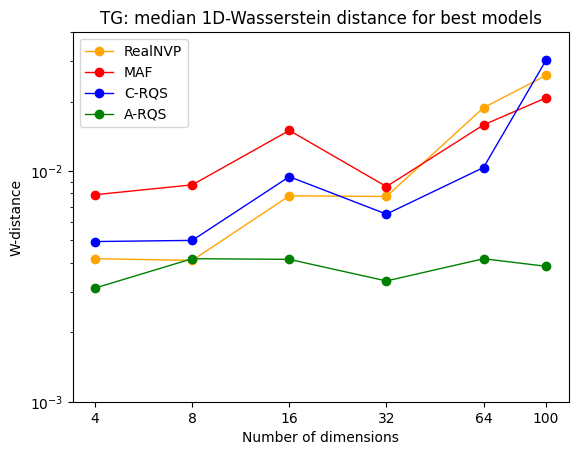

In [51]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_truncated_WD[:,0],RealNVPN_truncated_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_truncated_WD[:,0],MAFN_truncated_WD[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_truncated_WD[:,0],CsplineN_truncated_WD[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_truncated_WD[:,0],MsplineN_truncated_WD[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_truncated_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_truncated_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_truncated_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_truncated_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('W-distance')
plt.ylim(0.001,0.04)
plt.title("Best Models for Truncated Gaussians")
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100], ['4','8','16','32','64','100'])
plt.savefig(paper_fig_dir + 'Best_WD_median_truncated.pdf')
plt.show()
plt.close()

### KS

In [44]:
MsplineN_truncated_KS = extract_lines(df_bests_truncated,"MsplineN","corr","ks_test_median")
CsplineN_truncated_KS = extract_lines(df_bests_truncated,"CsplineN","corr","ks_test_median")
MAFN_truncated_KS = extract_lines(df_bests_truncated,"MAFN","corr","ks_test_median")
RealNVPN_truncated_KS = extract_lines(df_bests_truncated,"RealNVPN","corr","ks_test_median")

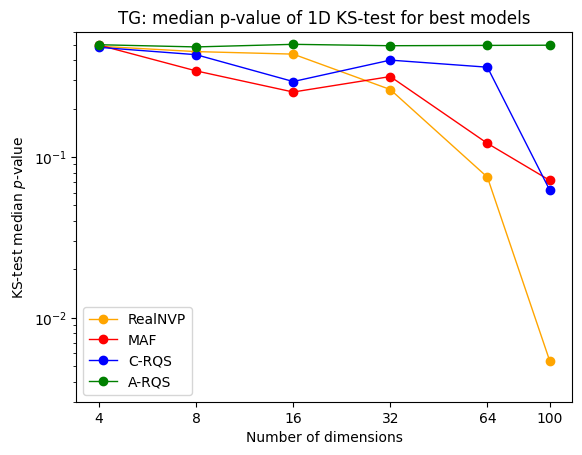

In [46]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_truncated_KS[:,0],RealNVPN_truncated_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_truncated_KS[:,0],MAFN_truncated_KS[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_truncated_KS[:,0],CsplineN_truncated_KS[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_truncated_KS[:,0],MsplineN_truncated_KS[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_truncated_KS:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_truncated_KS:
        plt.text(i[0]*1.05,i[1]*0.98, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_truncated_KS:
        plt.text(i[0]*1.05,i[1]*1.01, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_truncated_KS:
        plt.text(i[0]*0.85,i[1]*0.98, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('KS-test median $p$-value')
plt.ylim(0.003,0.6)
plt.title("TG: median p-value of 1D KS-test for best models")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100], ['4','8','16','32','64','100'])
plt.savefig(paper_fig_dir + 'Best_KS_median_truncated.pdf')
plt.show()
plt.close()

### Frobenius-norm

In [47]:
MsplineN_truncated_FN = extract_lines(df_bests_truncated,"MsplineN","corr","frob_norm")
CsplineN_truncated_FN = extract_lines(df_bests_truncated,"CsplineN","corr","frob_norm")
MAFN_truncated_FN = extract_lines(df_bests_truncated,"MAFN","corr","frob_norm")
RealNVPN_truncated_FN = extract_lines(df_bests_truncated,"RealNVPN","corr","frob_norm")

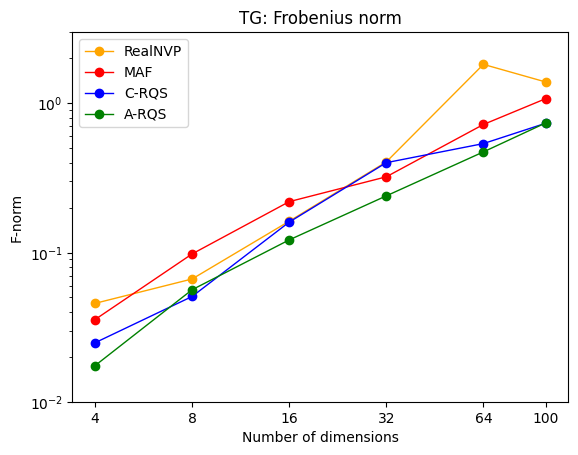

In [49]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_truncated_FN[:,0],RealNVPN_truncated_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_truncated_FN[:,0],MAFN_truncated_FN[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_truncated_FN[:,0],CsplineN_truncated_FN[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_truncated_FN[:,0],MsplineN_truncated_FN[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_truncated_FN:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_truncated_FN:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_truncated_FN:
        plt.text(i[0]*1.05,i[1]*0.8, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_truncated_FN:
        plt.text(i[0]*0.85,i[1]*0.75, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('F-norm')
plt.ylim(0.01,3)
plt.title("TG: Frobenius norm")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100], ['4','8','16','32','64','100'])
plt.savefig(paper_fig_dir + 'Best_FN_truncated.pdf')
plt.show()
plt.close()

### Training time

In [49]:
MsplineN_truncated_time = extract_lines(df_bests_truncated,"MsplineN","corr","time").astype(np.float)
CsplineN_truncated_time = extract_lines(df_bests_truncated,"CsplineN","corr","time").astype(np.float)
MAFN_truncated_time = extract_lines(df_bests_truncated,"MAFN","corr","time").astype(np.float)
RealNVPN_truncated_time = extract_lines(df_bests_truncated,"RealNVPN","corr","time").astype(np.float)

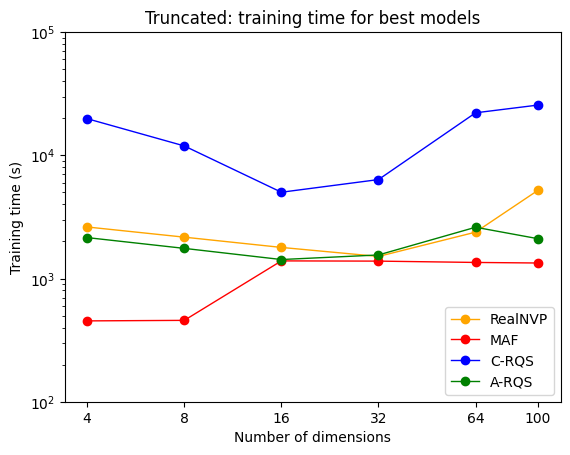

In [50]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_truncated_time[:,0],RealNVPN_truncated_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_truncated_time[:,0],MAFN_truncated_time[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_truncated_time[:,0],CsplineN_truncated_time[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_truncated_time[:,0],MsplineN_truncated_time[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_truncated_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_truncated_time:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_truncated_time:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_truncated_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('Training time (s)')
plt.ylim(100,100000)
plt.title("Truncated: training time for best models")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100], ['4','8','16','32','64','100'])
plt.savefig(paper_fig_dir + 'Best_training_time_truncated.pdf')
plt.show()
plt.close()

## Tables

In [60]:
tmp=df_bests_truncated[5]
print(tmp["ndims"].iloc[0])
tmp=tmp[tmp["correlation"]=="corr"]
tmp=tmp[["hidden_layers","nbijectors","bijector","spline_knots","batch_size","Wasserstein_median", "ks_test_median", "frob_norm","epochs_output","time"]]
tmp["Wasserstein_median"]=tmp["Wasserstein_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["ks_test_median"]=tmp["ks_test_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["frob_norm"]=tmp["frob_norm"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["time"]=tmp["time"].apply(lambda x: int(float(x)))
string=tmp.to_latex()
print(string)

100
\begin{tabular}{llrlrrlllrr}
\toprule
{} & hidden\_layers &  nbijectors &  bijector &  spline\_knots &  batch\_size & Wasserstein\_median & ks\_test\_median & frob\_norm &  epochs\_output &   time \\
\midrule
0  &   128-128-128 &           2 &  MsplineN &             8 &         512 &           3.86e-03 &       4.97e-01 &  7.40e-01 &            384 &   2104 \\
4  &   128-128-128 &          10 &      MAFN &             8 &         512 &           2.08e-02 &       7.15e-02 &  1.08e+00 &            304 &   1336 \\
7  &   256-256-256 &           5 &  RealNVPN &             8 &         256 &           2.60e-02 &       5.34e-03 &  1.39e+00 &           1000 &   5208 \\
11 &   256-256-256 &           5 &  CsplineN &            12 &         512 &           3.02e-02 &       6.20e-02 &  7.36e-01 &           1000 &  25587 \\
\bottomrule
\end{tabular}



C:\Users\rtorre\AppData\Local\Temp\ipykernel_36160\3173191920.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string=tmp.to_latex()
